In [11]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Hand-in assignment

We are going to solve a deconvolution problem $Ku = f$, where $K$ is a *Toeplitz matrix* with elements
$$k_{ij} = c_{|i - j|},$$
with $c_i = \frac{e^{-a(i-j)^2}}{(n-1)\sqrt{\pi/a}}$, and we are given noisy measurements 
$$f^{\delta} = Ku + e,$$
where the entries of $e$ are normally distrubuted with mean zero and variance $\delta^2$.

An example of a typical image $u$ and its corresponding noisy measurements $f^\delta$ is shown below

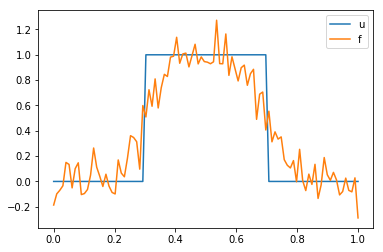

In [46]:
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)


c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

u = abs(x - 0.5)<.2
f = K@u + delta*np.random.randn(n)

plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()

The goal of this assignment is to solve this inverse problem using a (truncated) SVD for two scenario's

1. `u` as defined above
2. `u = x*(x-1)`

1. Is this problem ill-posed in general? Why? 
2. Compute the (pseudo-)inverse of $K$ using the SVD and compute the backward error $|u - u^{\delta}|_2$ for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's; what do you notice?
3. Compute a regularized solution using a truncated SVD for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's. Manually choose the truncation paramater $k$ in each case to get the best possible solution. What do you notice here?
4. Explain your observations by investigating what the singular vectors look like.